In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
sc.set_figure_params(figsize=(4, 4))
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(4,4)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [2]:
Futs = ["FUT1","FUT2","FUT3","FUT4","FUT5","FUT6","FUT7","FUT8","FUT9","FUT10","FUT11"]
st32 = ["ST3GAL1","ST3GAL2","ST3GAL3","ST3GAL4","ST3GAL5","ST3GAL6"]
st6gal = ["ST6GAL1","ST6GAL2"]
gcnt = ["GCNT1","GCNT2","GCNT3","GCNT4"]
b3gnt = ["B3GNT2","B3GNT3","B3GNT4","B3GNT5","B3GNT6","B3GNT7","B3GNT8","B3GNT9"]
b3galt = ["B3GALT1","B3GALT2","B3GALT4","B3GALT5","B3GALT6"]
b4galt = ["B4GALT1","B4GALT2","B4GALT3","B4GALT4","B4GALT5","B4GALT6","B4GALT7","B4GALT8","B4GALT9"]
st6galnac = ["ST6GALNAC1","ST6GALNAC2","ST6GALNAC3","ST6GALNAC4","ST6GALNAC5","ST6GALNAC6"]
b3gat = ["B3GAT1","B3GAT2","B3GAT3","B2GLCT"]
b3galnt = ["B3GALNT1","B3GALNT2"]
b4galnt = ["B4GALNT1","B4GALNT2","B4GALNT3","B4GALNT4"]
genelists = [Futs,st32,st6gal,gcnt,b3gnt,b3galt,b4galt,st6galnac,b3gat,b4galnt,b3galnt]



In [3]:
adata=sc.read_h5ad("../../../harmony_integrated_for_collab.h5ad")

In [4]:
adata.uns["Study_colors"] = ['#ff7f0e','#279e68',"#FF00FF"]

In [31]:
adata.obs["Study"]=adata.obs["Study"].cat.reorder_categories(["Nyquist2022","Twigger2022","Martin-Carli2020"])

/Users/snyquist/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/Users/snyquist/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/snyquist/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


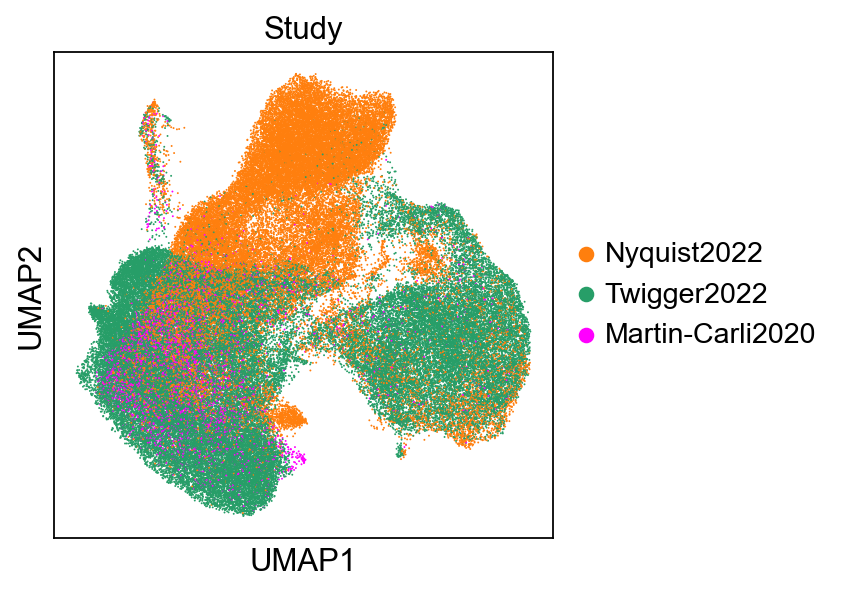

In [42]:
sc.pl.umap(adata,color="Study",size=3)

/Users/snyquist/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/Users/snyquist/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/snyquist/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


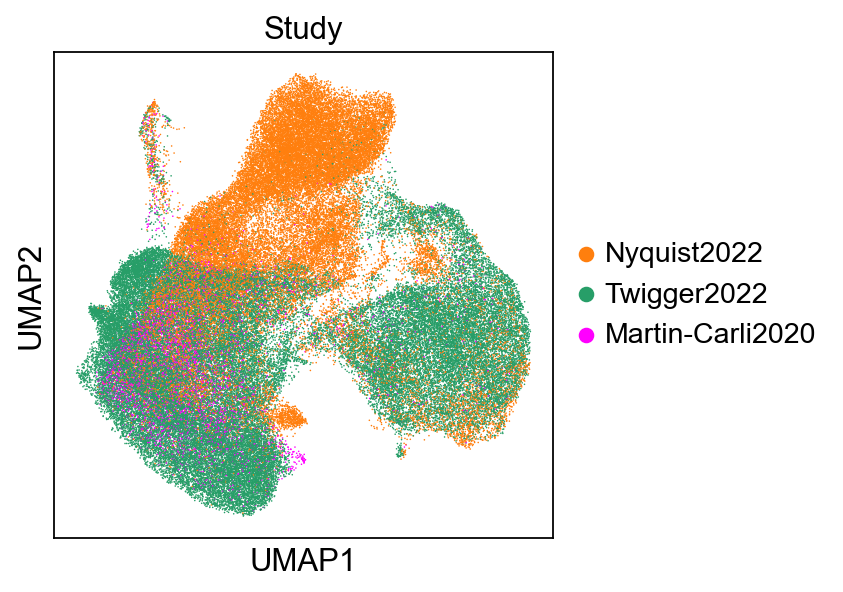

In [45]:
sc.pl.umap(adata,color="Study",size=2,show=False)
plt.savefig("../Figures/Figure1 - Schematics/Fig1_umap.png",bbox_inches="tight")

In [6]:
adata_sub = adata[adata.obs["clusters"].isin(["LC1","LC2"])]
adata_sub.obs["celltype_dataset"] = adata_sub.obs["clusters"].astype(str)+adata_sub.obs["Study"].astype(str)
adata_sub.obs["Sample"]=adata_sub.obs["biosample_id"].astype(str)
adata_sub.obs.loc[adata_sub.obs["Study"].isin(["Twigger2022","Martin-Carli2020"]),"Sample"] = adata_sub.obs.loc[adata_sub.obs["Study"].isin(["Twigger2022","Martin-Carli2020"]),'Donor']
lc1 = adata_sub[adata_sub.obs["clusters"]=="LC1"]
lc2 = adata_sub[adata_sub.obs["clusters"]=="LC2"]


/Users/snyquist/opt/anaconda3/envs/pertpy/lib/python3.11/site-packages/pandas/core/arrays/categorical.py:595: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)
/Users/snyquist/opt/anaconda3/envs/pertpy/lib/python3.11/site-packages/pandas/core/arrays/categorical.py:595: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)
/var/folders/2w/wzpnv4x92_lbnlcccg_sb4t40000gq/T/ipykernel_11119/3800623671.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sub.obs["celltype_dataset"] = adata_sub.obs["clusters"].astype(str)+adata_sub.obs["Study"].astype(str)
/Users/snyquist/opt/anaconda3/envs/pertpy/lib/python3.11/site-packages/pandas/core/arrays/categorical.py:595: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)


In [7]:
len(adata_sub.obs["Sample"].unique())

71

In [8]:
genes = []
for g in genelists:
    genes= genes+[i for i in g if i in adata_sub.raw.var_names]


In [9]:
import scipy.stats
def hypergeom_p(gene1,gene2):
    pop_size = gene1.shape[0] #M
    num_successes_pop = (gene1>0).sum() #n
    num_draws = (gene2>0).sum() #N
    observed_successes = ((gene2>0) & (gene1>0)).sum() #k
    # make sure at least 2% of cells are expressing each gene and that this is more than 5 cells
    pct_exp_gene1 = num_successes_pop/pop_size
    pct_exp_gene2 = num_draws/pop_size
    if (pct_exp_gene1 > .02) and (pct_exp_gene2 > 0.02) and (num_successes_pop >= 5) and (num_draws >=5):
        i= scipy.stats.hypergeom.sf(observed_successes-1,pop_size,num_successes_pop,num_draws),scipy.stats.hypergeom.cdf(observed_successes-1,pop_size,num_successes_pop,num_draws)
        #print(i)
        return i[0]
    else:
        return np.nan

In [10]:
#If something isnt working, check that there are no duplicate genes!
def make_hypergeometric_dataframe(adata, genes,method=hypergeom_p):
    df = pd.DataFrame(np.zeros((len(genes),len(genes))),index=genes,columns=genes)
    upper_triangular = np.triu(df,k=1)
    upper_triangular[np.tril_indices(upper_triangular.shape[0], 0)] = np.nan
    h_df=pd.DataFrame(upper_triangular, index=genes,columns=genes).stack().reset_index()
    h_df["genes"] = h_df["level_0"] + h_df["level_1"]
    h_df.columns = ["gene1","gene2","full corr","genes"]
    h_df.index = h_df["genes"]
    h_df = h_df[["gene1","gene2"]]
    for s in adata_sub.obs["Sample"].unique():
        df_for_h = pd.DataFrame(adata.raw[adata.obs["Sample"]==s,genes].X.todense(),columns=genes)
        if df_for_h.shape[0] > 10:
            corr = df_for_h.corr(method=method)
            #p = r_pvalues(df_for_h)
            #corr = corr[p<0.05]
            upper_triangular = np.triu(corr,k=1)
            upper_triangular[np.tril_indices(upper_triangular.shape[0], 0)] = np.nan
            corr=pd.DataFrame(upper_triangular, index=genes,columns=genes).stack().reset_index()
            corr["genes"] = corr["level_0"] + corr["level_1"]
            
            h_df.loc[corr["genes"],s] = corr[0].values
    return h_df

In [29]:
def plot_relplot(pct_total_samples,n_total_samples,gene_order = None,height=10,vmax=1.0,vmin=0.2):
    long_pct_total = pct_total_samples.loc[gene_order,gene_order].unstack().reset_index(name="pct total")
    long_n_total = n_total_samples.loc[gene_order,gene_order].unstack().reset_index(name="n samples")
    
    long_tot_and_pct = pd.merge(long_n_total,long_pct_total, on=["level_0","level_1"])
    long_tot_and_pct=long_tot_and_pct.fillna(0)
    g=sns.relplot(data=long_tot_and_pct, x="level_0",y="level_1" ,hue="pct total",size="n samples",palette="YlGn", edgecolor=".7",
        height=height, sizes=(0, 500),hue_norm = (vmin,vmax))
    g.set(xlabel="", ylabel="", aspect="equal")
    g.despine(left=True, bottom=True)
    g.ax.margins(.02)
    for label in g.ax.get_xticklabels():
        label.set_rotation(90)
    return g

In [12]:
#make data object that you can visualize in this way - two matrices one with the percent 
#of total samples and one with the total sample number included
def find_pct_associated(h_df_lc2,total_association_groups,n_assoc=50,include_all_genepairs = True):

    
    top_assoc_plt = (h_df_lc2.iloc[:,2:]<0.05).sum(axis=1).sort_values(ascending=False).head(n_assoc).index
    if include_all_genepairs:
        top_assoc_plt = (h_df_lc2.iloc[:,2:]<0.05).sum(axis=1).sort_values(ascending=False).index
    genes_included = list(set(h_df_lc2.loc[top_assoc_plt,"gene1"].values).union(set(h_df_lc2.loc[top_assoc_plt,"gene2"].values)))
    pct_total_samples = pd.DataFrame(index=genes_included, columns= genes_included)
    n_total_samples = pd.DataFrame(index=genes_included, columns= genes_included)
    
    
    for i in top_assoc_plt:
        g1 = h_df_lc2.loc[i,"gene1"]
        g2 = h_df_lc2.loc[i,"gene2"]
        tot = 0 # in case there isnt any associations, 
        if 1.0 in total_association_groups.loc[i].index:
            tot = total_association_groups.loc[i].loc[1.0,"level_1"]
        if 0.0 in total_association_groups.loc[i].index:
            tot += total_association_groups.loc[i].loc[0.0,"level_1"] 
        if -1.0 in total_association_groups.loc[i].index:
            tot += total_association_groups.loc[i].loc[-1.0,"level_1"]
            
            
            
        if 1.0 in total_association_groups.loc[i].index:
            sig = total_association_groups.loc[i].loc[1.0,"level_1"]
            pct_sig = sig/tot
        else:
            sig = 0
            pct_sig = 0 # in case tot is also zero, avoid divide by zero error
        

        pct_total_samples.loc[g1,g2] = pct_sig
        pct_total_samples.loc[g2,g1] = pct_sig
        n_total_samples.loc[g1,g2] = tot
        n_total_samples.loc[g2,g1] = tot
        
    return pct_total_samples, n_total_samples

In [13]:
def count_associations_each_type(h_df):
    sig_assoc = (h_df.iloc[:,2:]<0.05).T
    lc2_associations = pd.DataFrame(np.zeros(sig_assoc.shape),index=sig_assoc.index,columns=sig_assoc.columns)
    lc2_associations = lc2_associations + (h_df.iloc[:,2:] < 0.05).T - (h_df.iloc[:,2:] > 0.95).T
    lc2_associations[h_df.iloc[:,2:].isna().T] = np.nan
    lc2_associations = lc2_associations.fillna("na")
    tall_associations = lc2_associations.unstack().reset_index()
    total_association_groups = tall_associations.groupby(["genes",0]).count()
    return total_association_groups

In [17]:
plasma_membrane_transporters = ["SLC2A1","SLC2A4","SLC2A8","SLC5A1","SLC3A2","SLC6A6","SLC7A5","SLC1A4","SLC27A1","SLC27A3","SLC27A4"]
lactose_synthesis = ["PGM2","UGP2","GALE","SLC35A2","LALBA","B4GALT1","CSN2"]
glycolysis = ["HK1","GPI","PFKM","ALDOC","TPI1","GAPDH","PGK1","PGAM1","ENO1","PKM","LDHA"]
pentose_phosphate_shunt = ["G6PD","PGLS","PGD","RPIA","TKT","TALDO1"]
gluconeogenesis = ["FBP1","PCK1","G6PC3"]
citric_acid_cycle = ["PC","PDHA1","DBT","DLAT","DLD","CS","SLC25A1","ACO1","IDH2","SUCLA2","SDHC","SDHD","FH","MDH2"]
mfg_genes = ["FABP3","BTN1A1","XDH","CIDEA","PLIN2","FASN"]


In [13]:
def run_full_relplot_analysis(adata,genes,height=10,n_assoc=50):
    h_df_lc1_mfg = make_hypergeometric_dataframe(adata, genes ,method=hypergeom_p)
    total_association_groups_lc1 = count_associations_each_type(h_df_lc1_mfg)
    pct_total_samples,_=find_pct_associated(h_df_lc1_mfg,total_association_groups_lc1,n_assoc=n_assoc,
                                            include_all_genepairs = False)
    m = sns.clustermap(pct_total_samples.fillna(0),cmap="Reds")
    gene_order = pct_total_samples.index[m.dendrogram_col.reordered_ind]
    pct_total_samples,n_total_samples=find_pct_associated(h_df_lc1_mfg,total_association_groups_lc1,
                                                          n_assoc=n_assoc,include_all_genepairs = True)

    plot_relplot(pct_total_samples,n_total_samples,gene_order = gene_order,height=height)


total gene number 70
h_df gene pair shape (2415, 72)
h_df unique gene 1s 69


/var/folders/2w/wzpnv4x92_lbnlcccg_sb4t40000gq/T/ipykernel_11119/4053965626.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  m = sns.clustermap(pct_total_samples.fillna(0),cmap="Reds")
/Users/snyquist/opt/anaconda3/envs/pertpy/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/Users/snyquist/opt/anaconda3/envs/pertpy/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/v

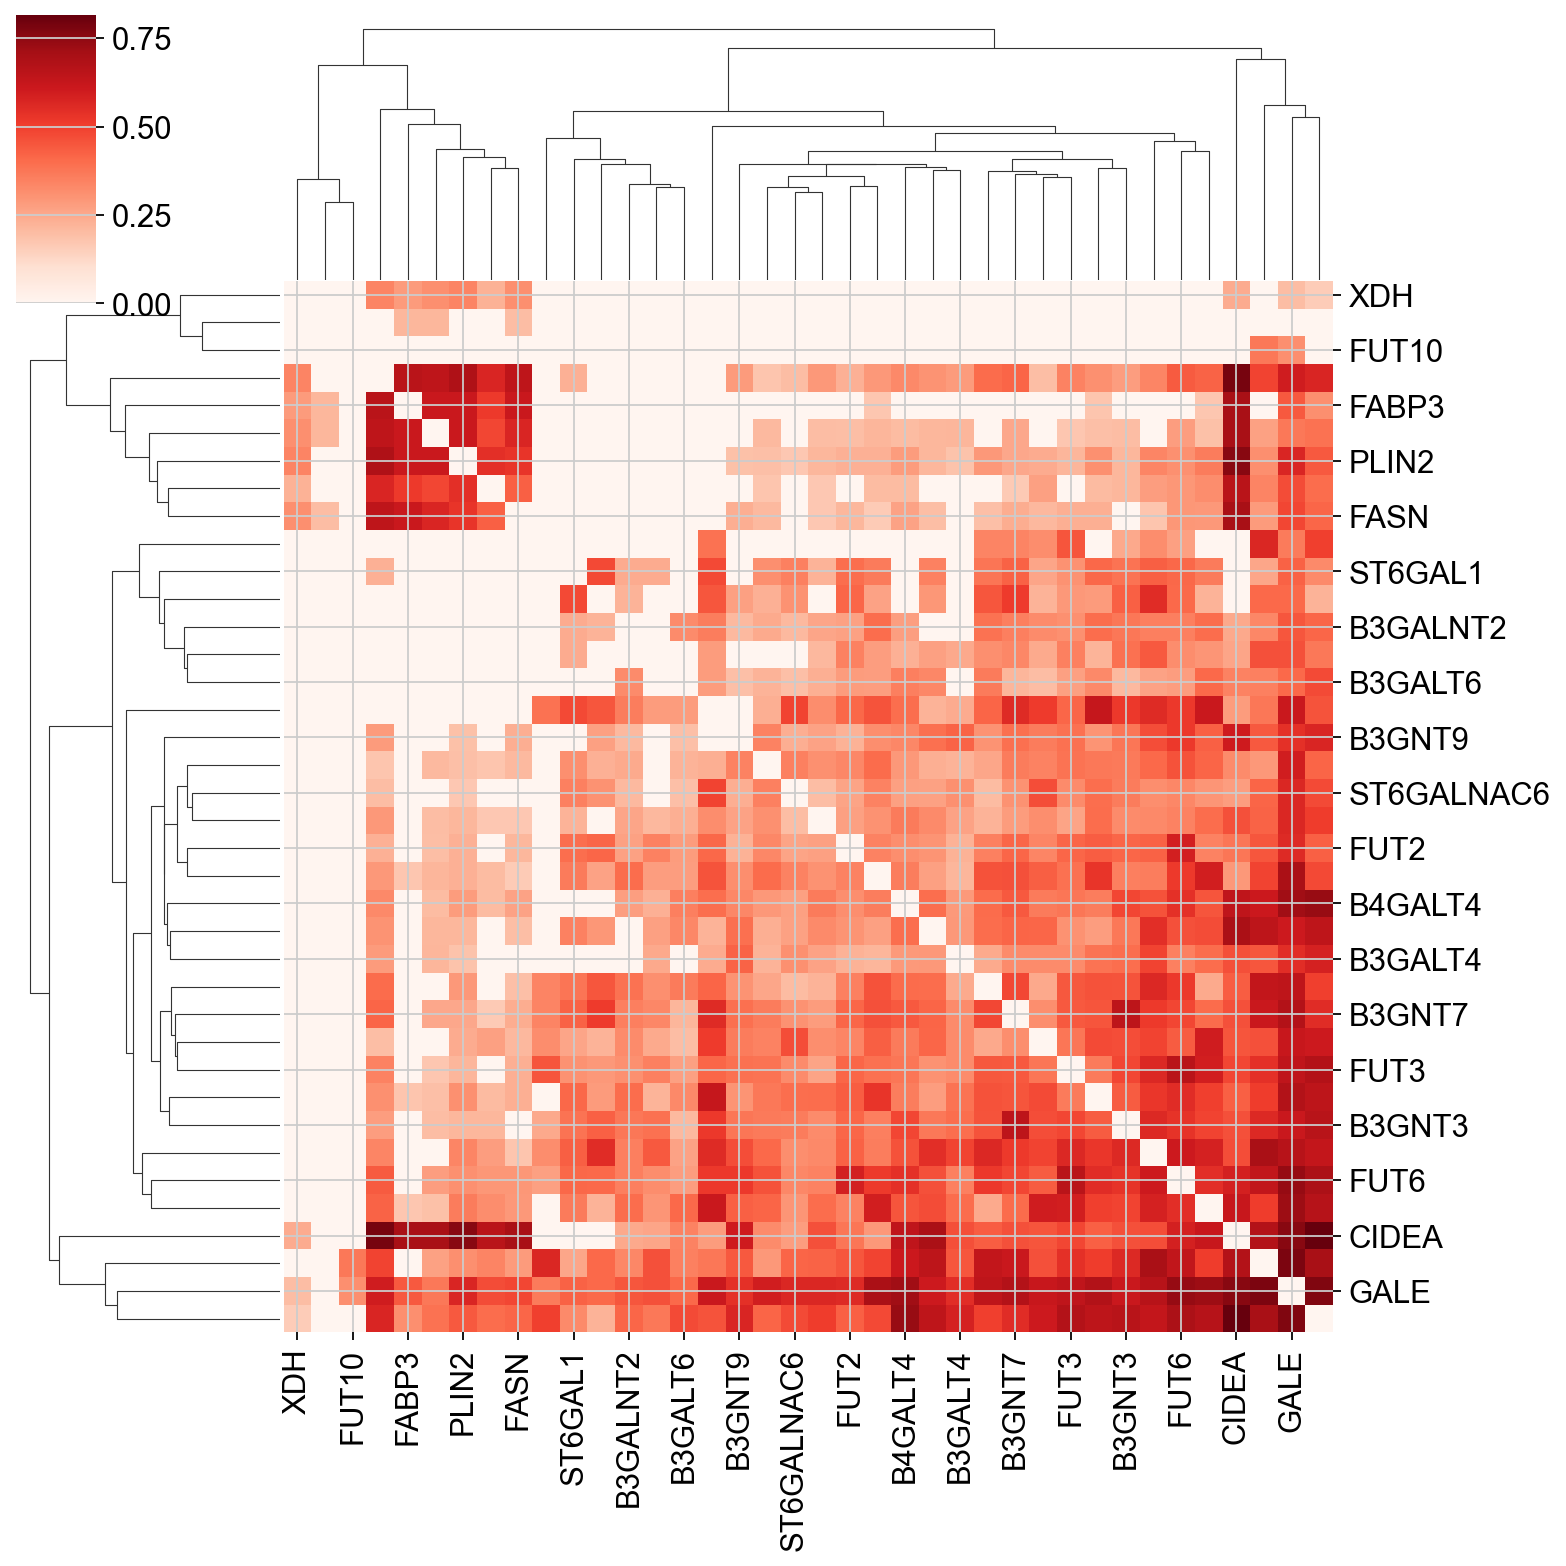

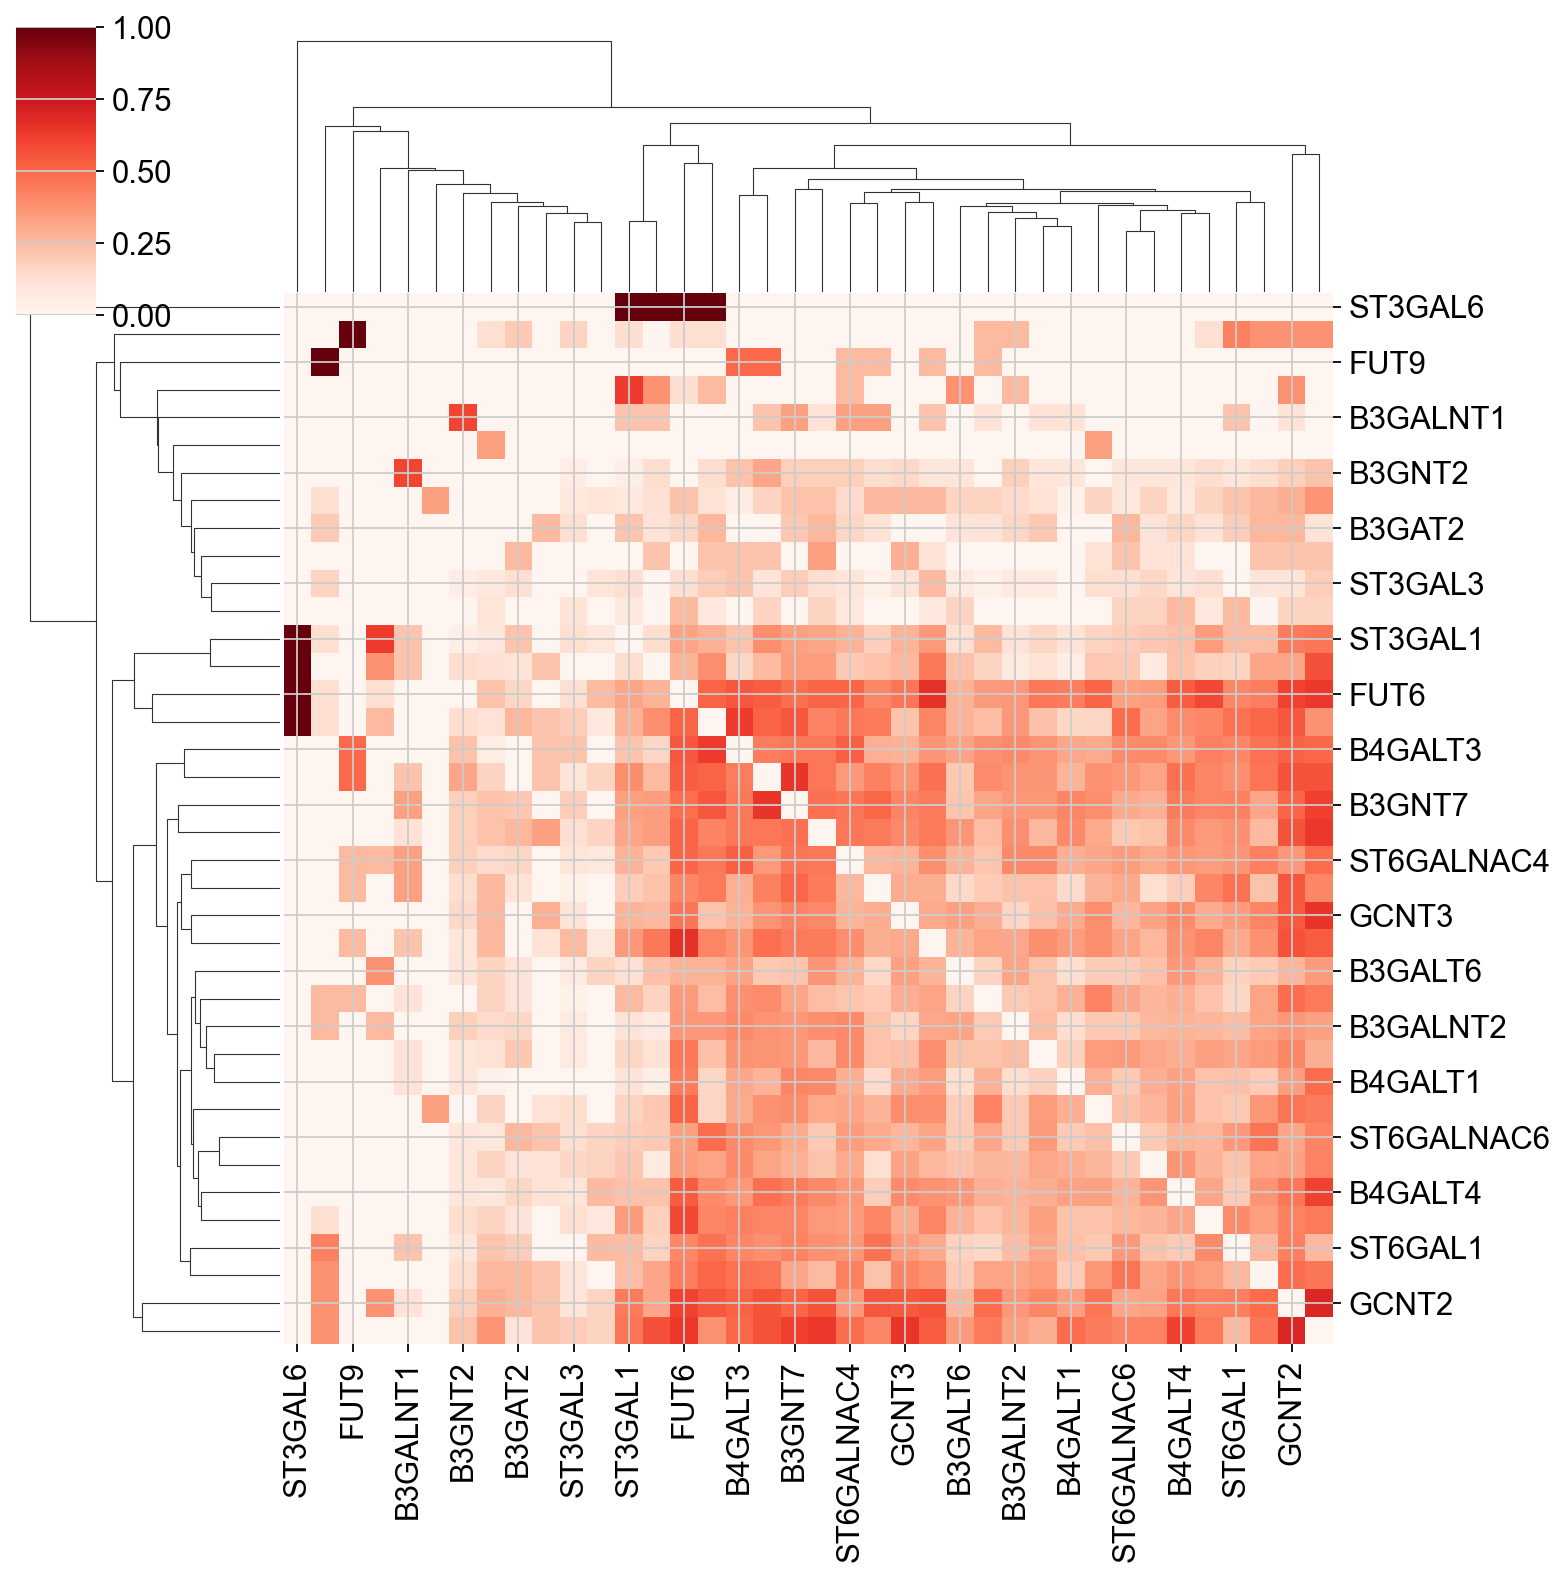

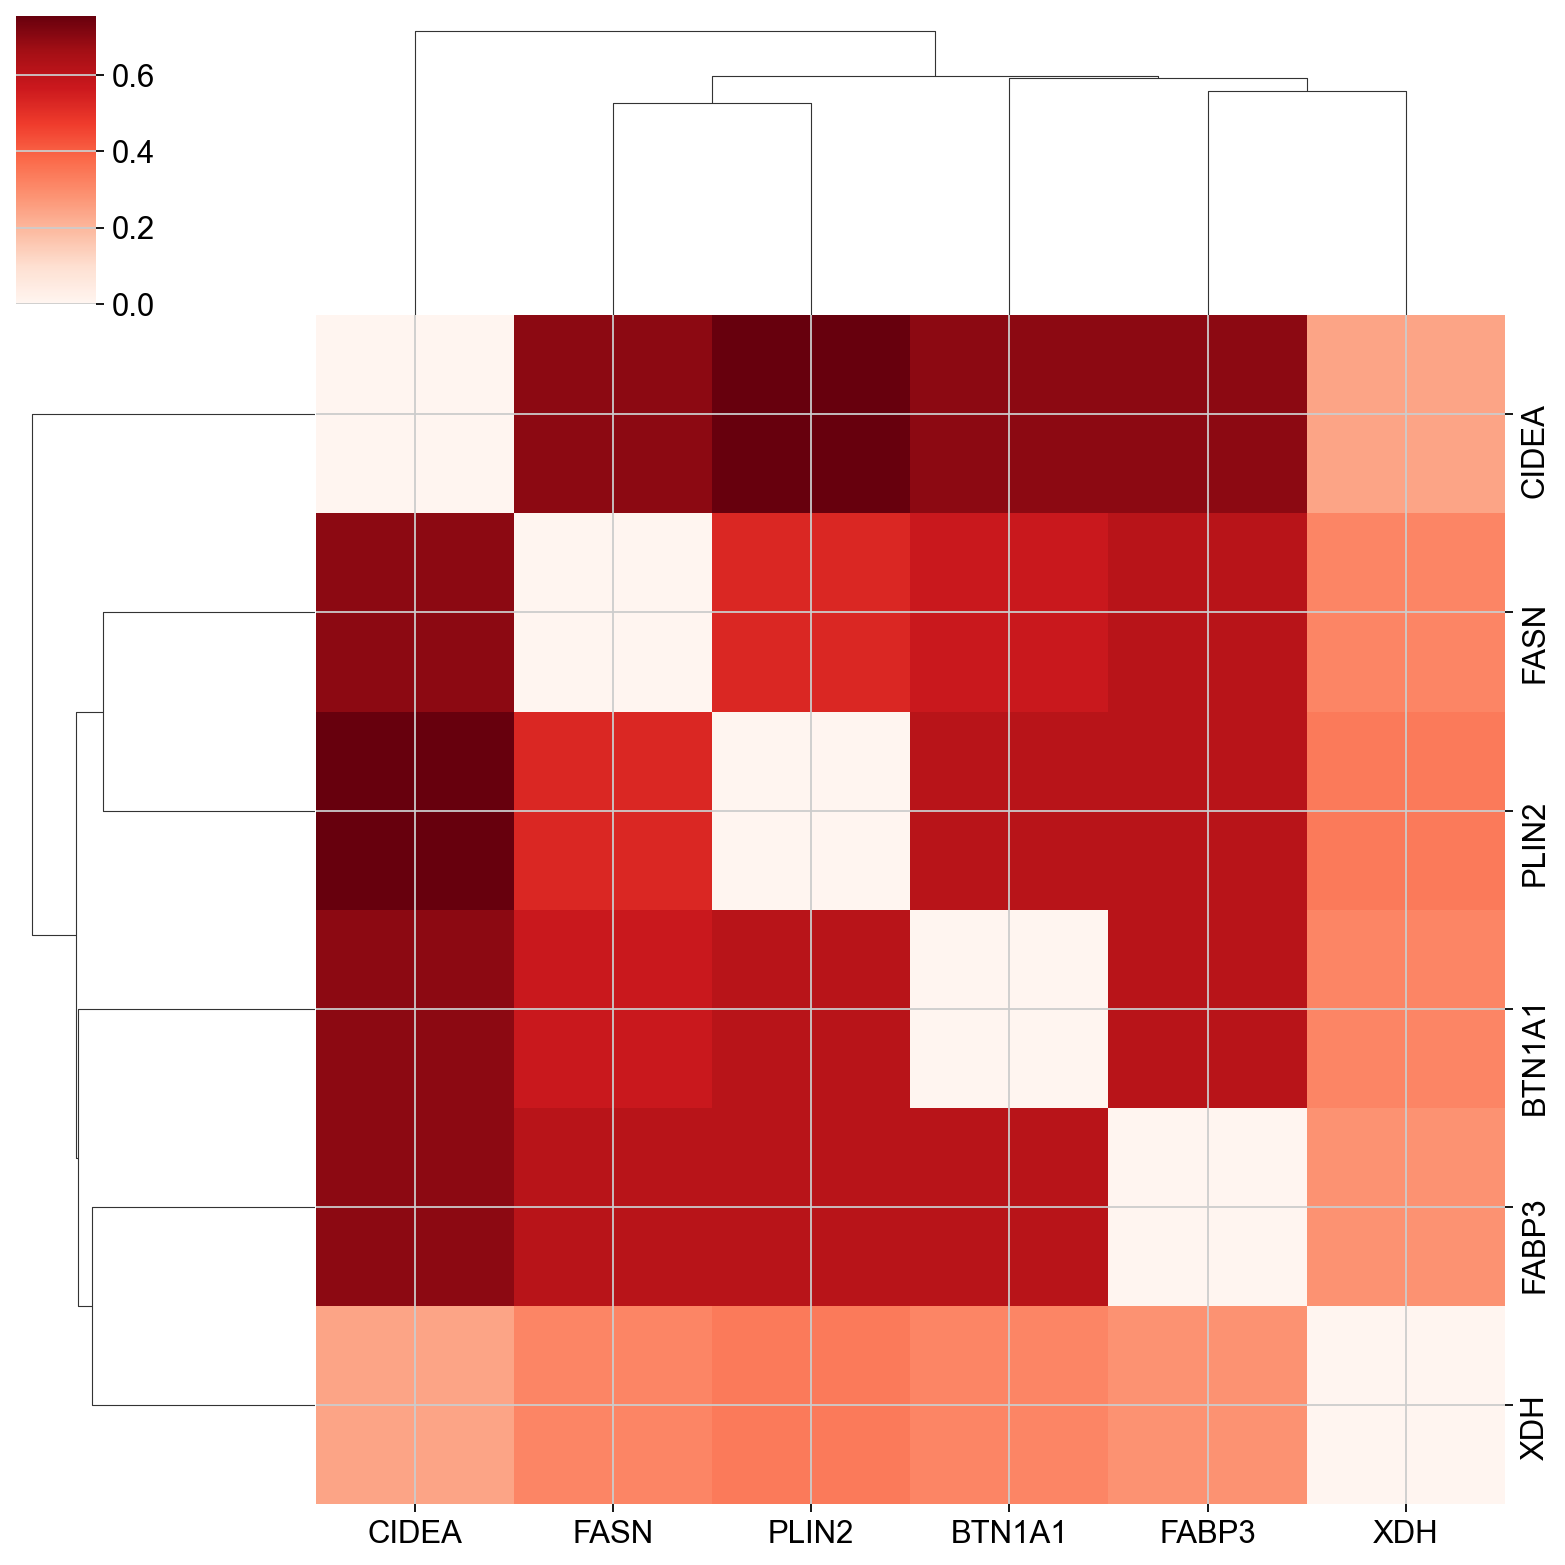

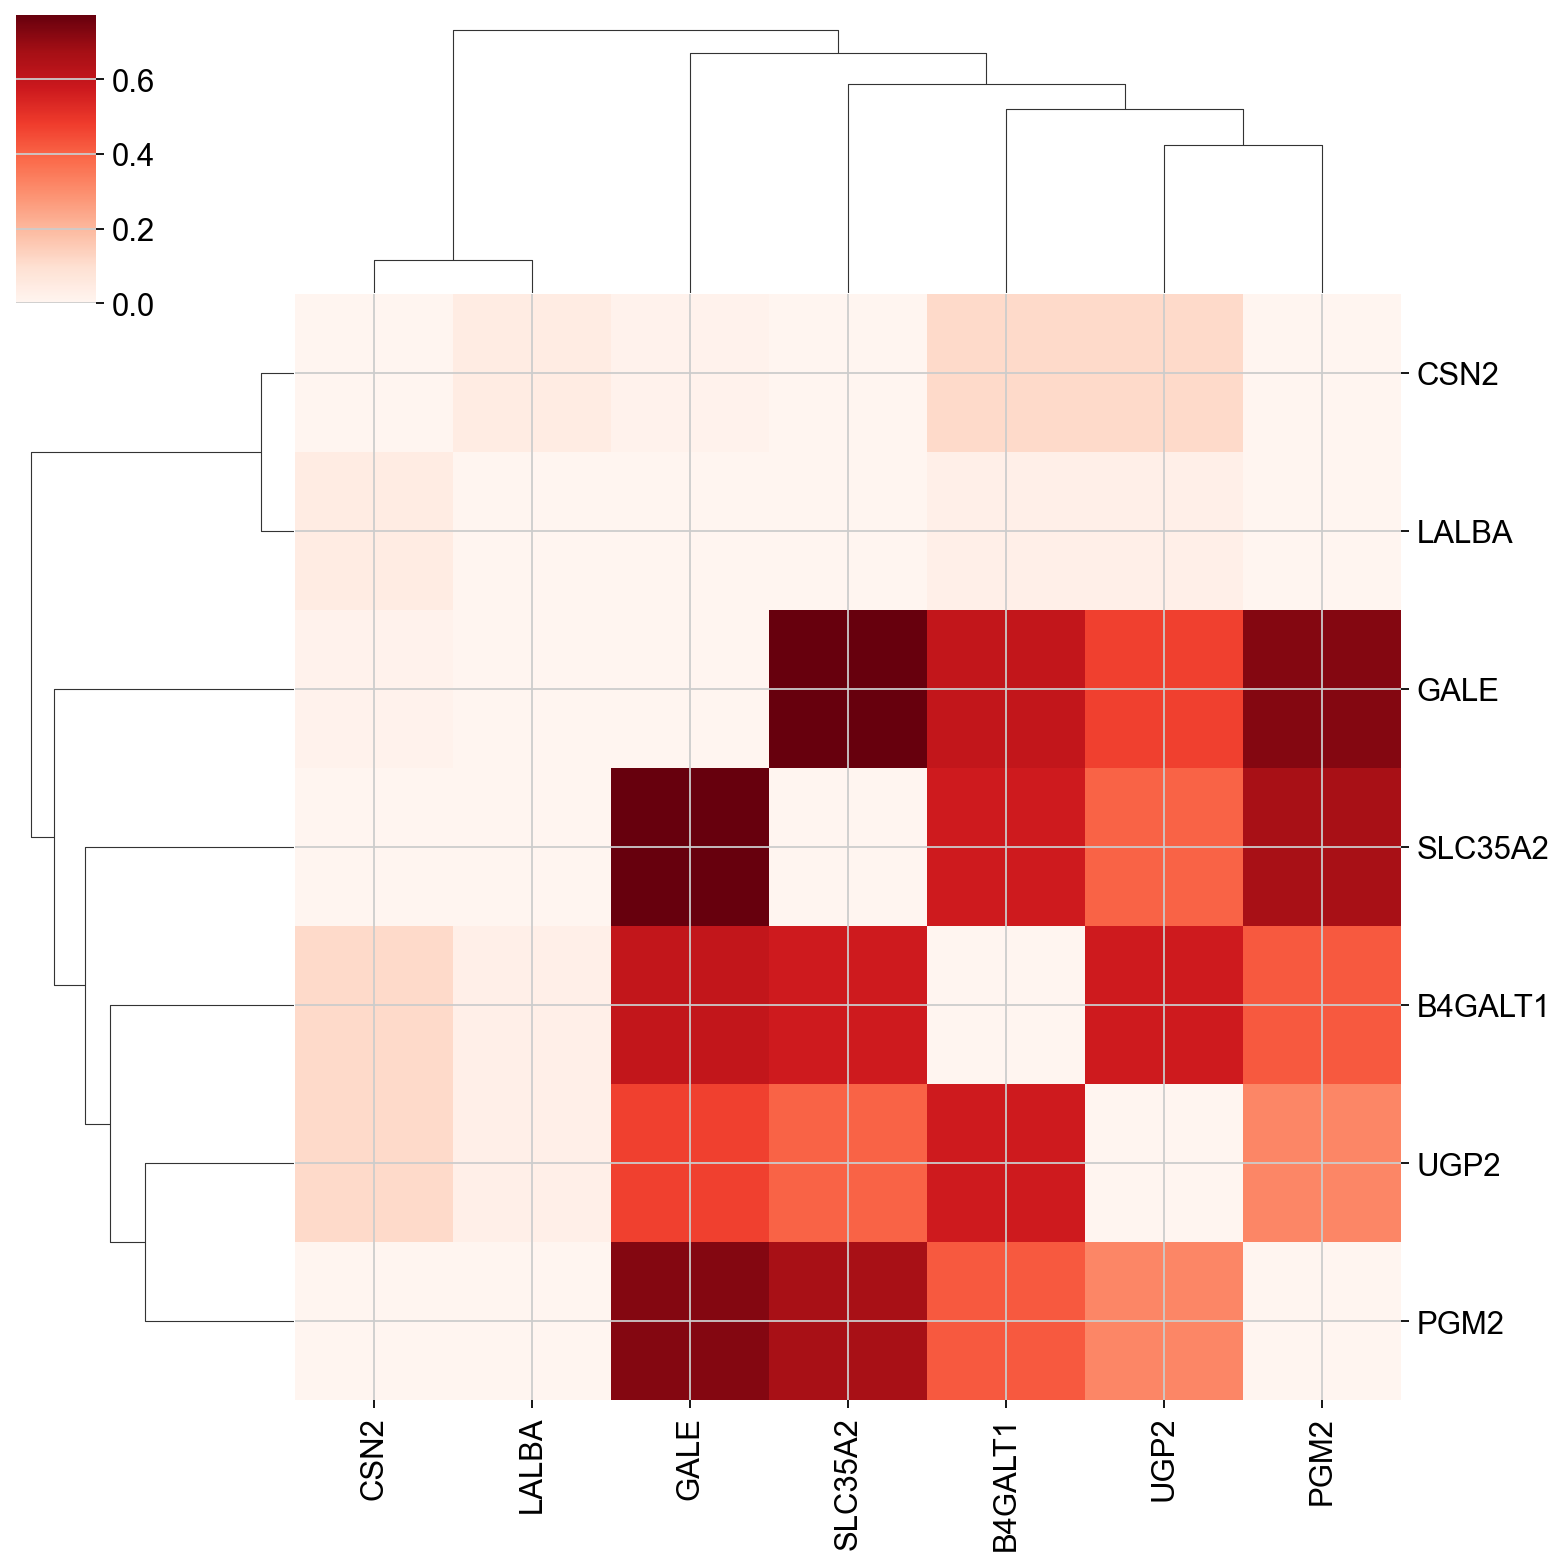

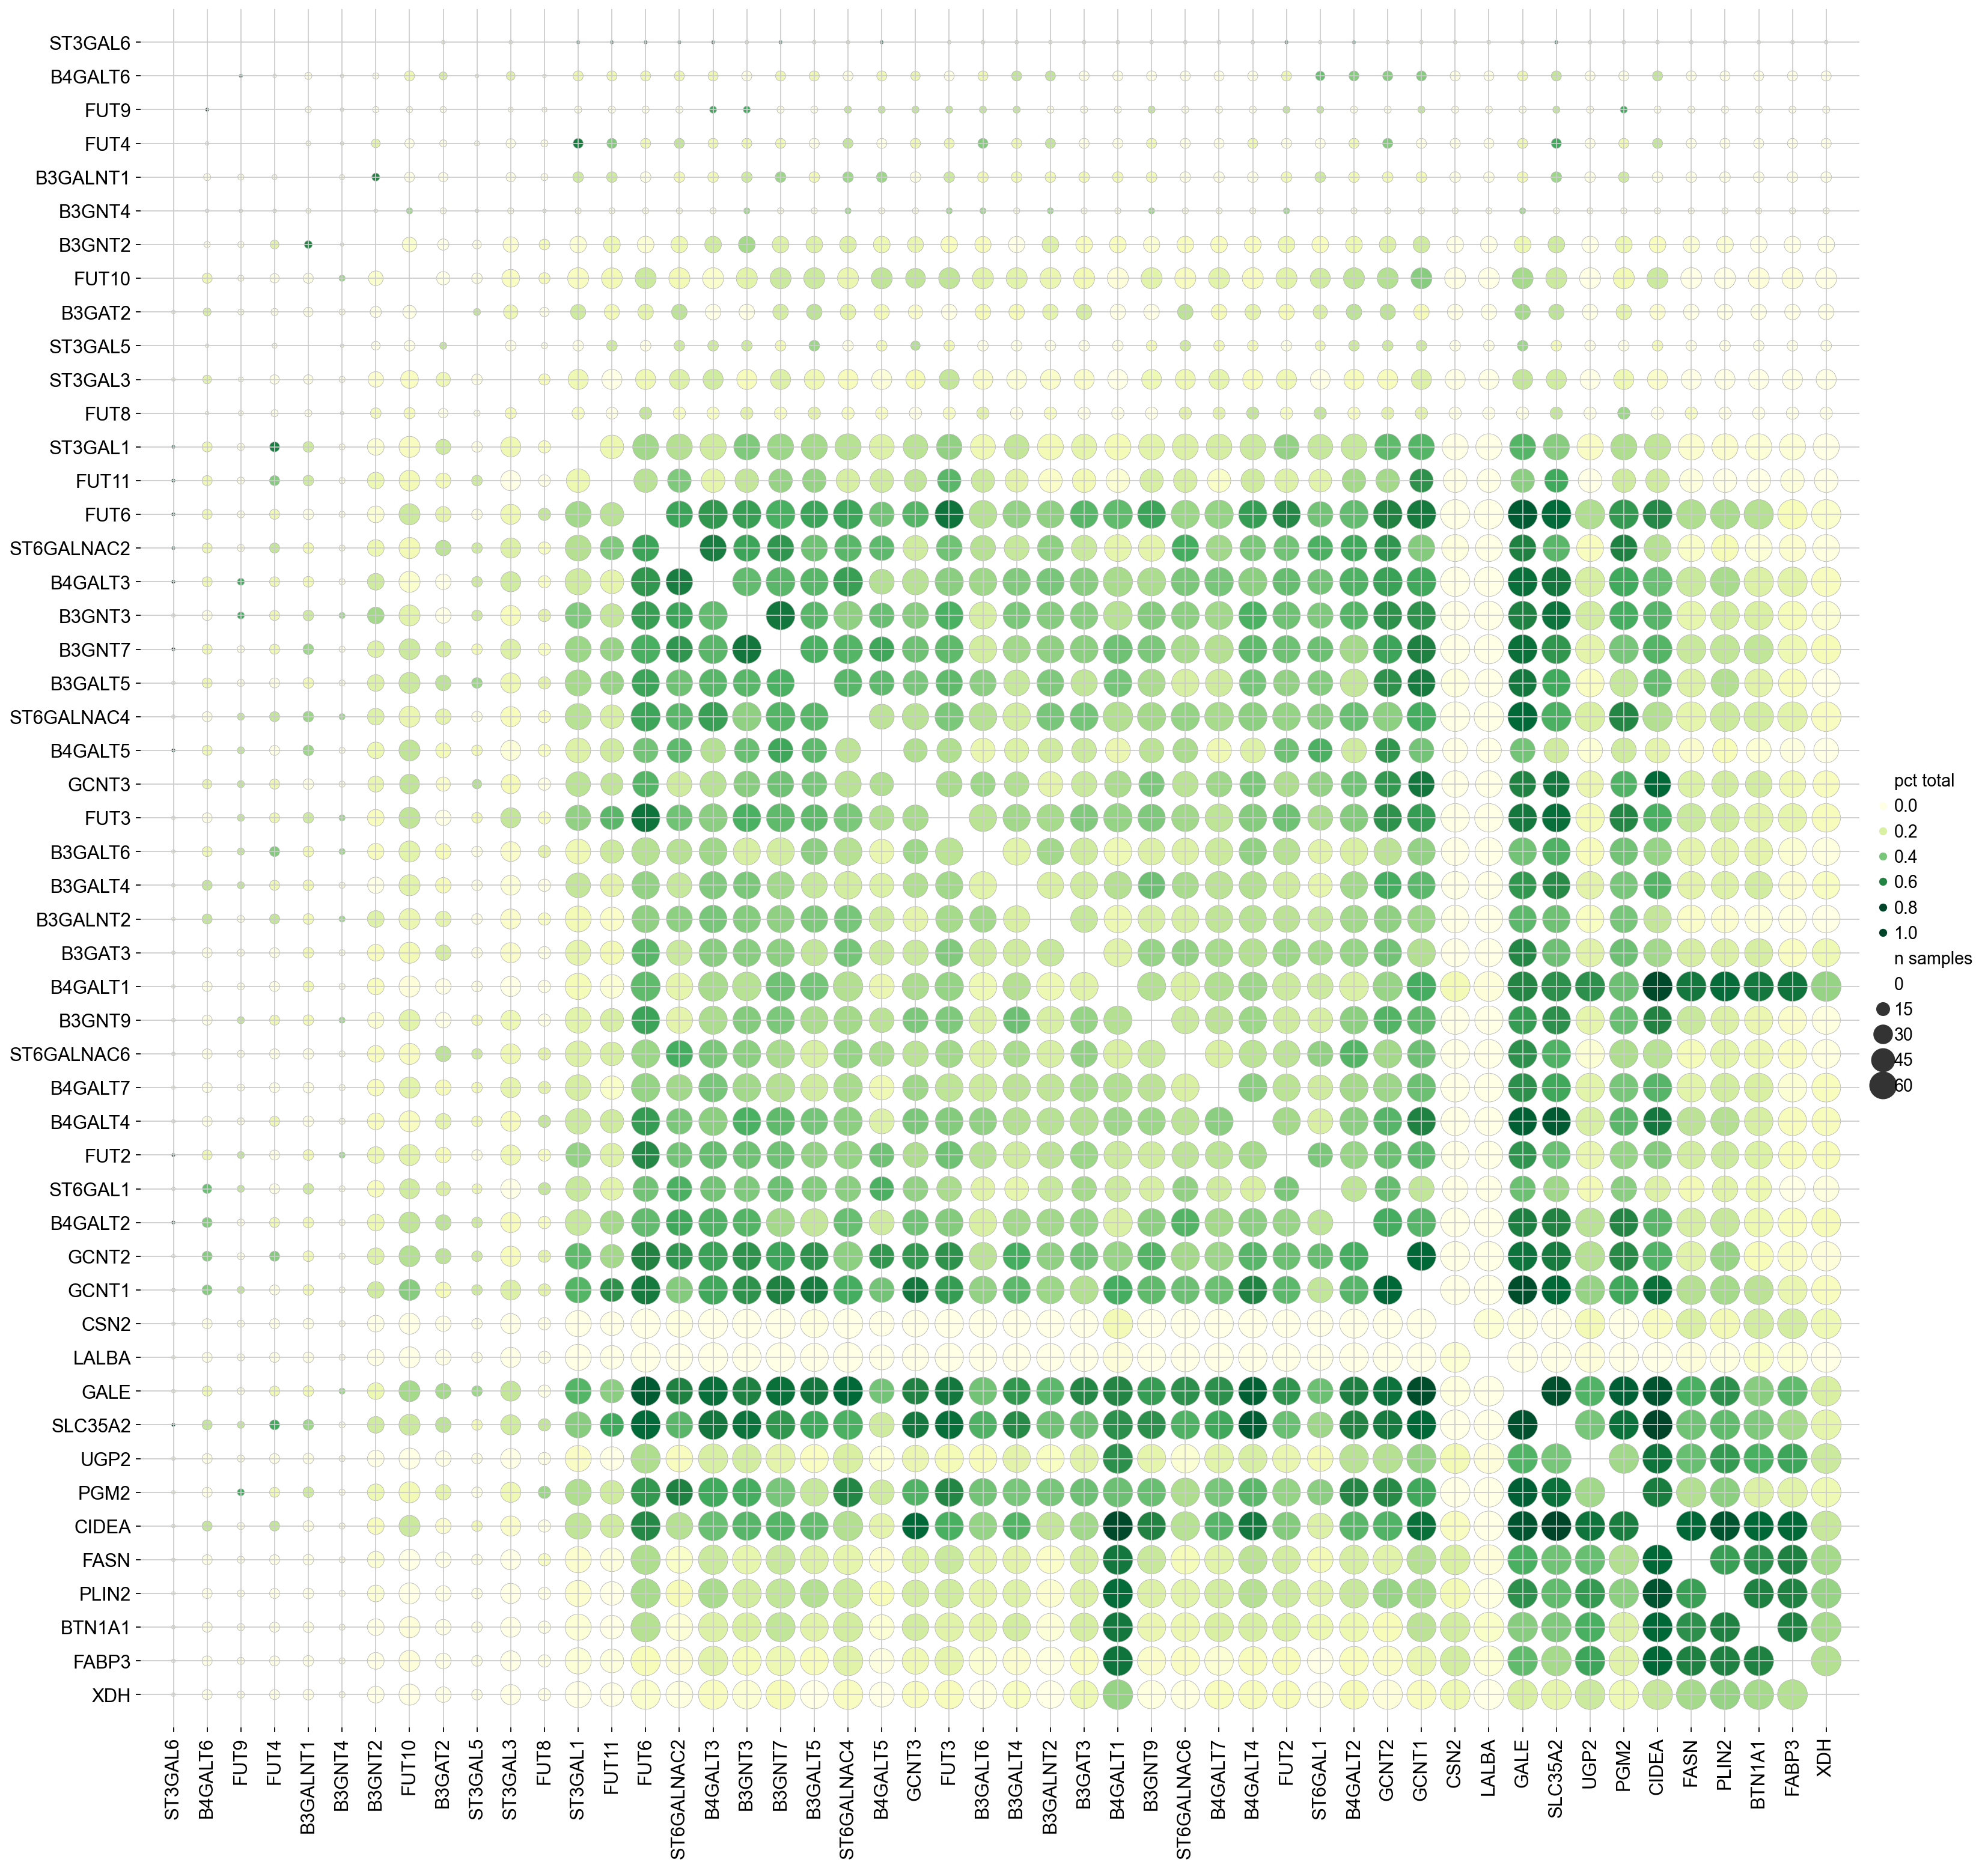

In [30]:
print("total gene number "+str(len(list(set(genes+mfg_genes+lactose_synthesis)))))
h_df_lc1_mfg = make_hypergeometric_dataframe(lc2, list(set(genes+mfg_genes+lactose_synthesis)),method=hypergeom_p)
print("h_df gene pair shape "+str(h_df_lc1_mfg.shape))
print("h_df unique gene 1s "+ str(len(h_df_lc1_mfg["gene1"].unique())))
total_association_groups_lc1 = count_associations_each_type(h_df_lc1_mfg)
pct_total_samples,_=find_pct_associated(h_df_lc1_mfg,total_association_groups_lc1,n_assoc=500,
                                        include_all_genepairs = False)
m = sns.clustermap(pct_total_samples.fillna(0),cmap="Reds")
gene_order = pct_total_samples.index[m.dendrogram_col.reordered_ind]
                                             
# get order of HMO genes
h_df_lc1_tmp = make_hypergeometric_dataframe(lc2, list(set(genes)),method=hypergeom_p)
total_association_groups_lc1_tmp = count_associations_each_type(h_df_lc1_tmp)
pct_total_samples_hmo,_=find_pct_associated(h_df_lc1_tmp,total_association_groups_lc1_tmp,n_assoc=500,
                                        include_all_genepairs = False)
m = sns.clustermap(pct_total_samples_hmo.fillna(0),cmap="Reds")
                                             
gene_order_HMO_genes = pct_total_samples_hmo.index[m.dendrogram_col.reordered_ind] 
#get order of mfg
h_df_lc1_tmp = make_hypergeometric_dataframe(lc2, list(set(mfg_genes)),method=hypergeom_p)
total_association_groups_lc1_tmp = count_associations_each_type(h_df_lc1_tmp)
pct_total_samples_mfg,_=find_pct_associated(h_df_lc1_tmp,total_association_groups_lc1_tmp,n_assoc=500,
                                        include_all_genepairs = False)
m = sns.clustermap(pct_total_samples_mfg.fillna(0),cmap="Reds")
                                             
gene_order_mfg_genes = pct_total_samples_mfg.index[m.dendrogram_col.reordered_ind] 

#get order of lactose synthesis
h_df_lc1_tmp = make_hypergeometric_dataframe(lc2, list(set(lactose_synthesis)),method=hypergeom_p)
total_association_groups_lc1_tmp = count_associations_each_type(h_df_lc1_tmp)
pct_total_samples_lac,_=find_pct_associated(h_df_lc1_tmp,total_association_groups_lc1_tmp,n_assoc=500,
                                        include_all_genepairs = False)
m = sns.clustermap(pct_total_samples_lac.fillna(0),cmap="Reds")
                                             
gene_order_lac_genes = pct_total_samples_lac.index[m.dendrogram_col.reordered_ind] 

pct_total_samples,n_total_samples=find_pct_associated(h_df_lc1_mfg,total_association_groups_lc1,
                                                      n_assoc=1000,include_all_genepairs = True)
gene_order = list(gene_order_HMO_genes) 
gene_order = gene_order + [i for i in list(gene_order_lac_genes) if i not in gene_order]
gene_order = gene_order + [i for i in list(gene_order_mfg_genes) if i not in gene_order]
gene_order = [i for i in gene_order if i in pct_total_samples.index]                         

plot_relplot(pct_total_samples,n_total_samples,gene_order = gene_order,height=20,vmax=0.8,vmin=0.0)
plt.savefig("/Users/snyquist/Dropbox (Gladstone)/HMO_scRNAseq_manuscript/Figures/Figure3 - Coexpression of HMO genes/Figure3B_LC2_HMO_MFG_Lactosesynth_relplot.pdf")

/var/folders/2w/wzpnv4x92_lbnlcccg_sb4t40000gq/T/ipykernel_11119/3846874998.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  long_tot_and_pct=long_tot_and_pct.fillna(0)


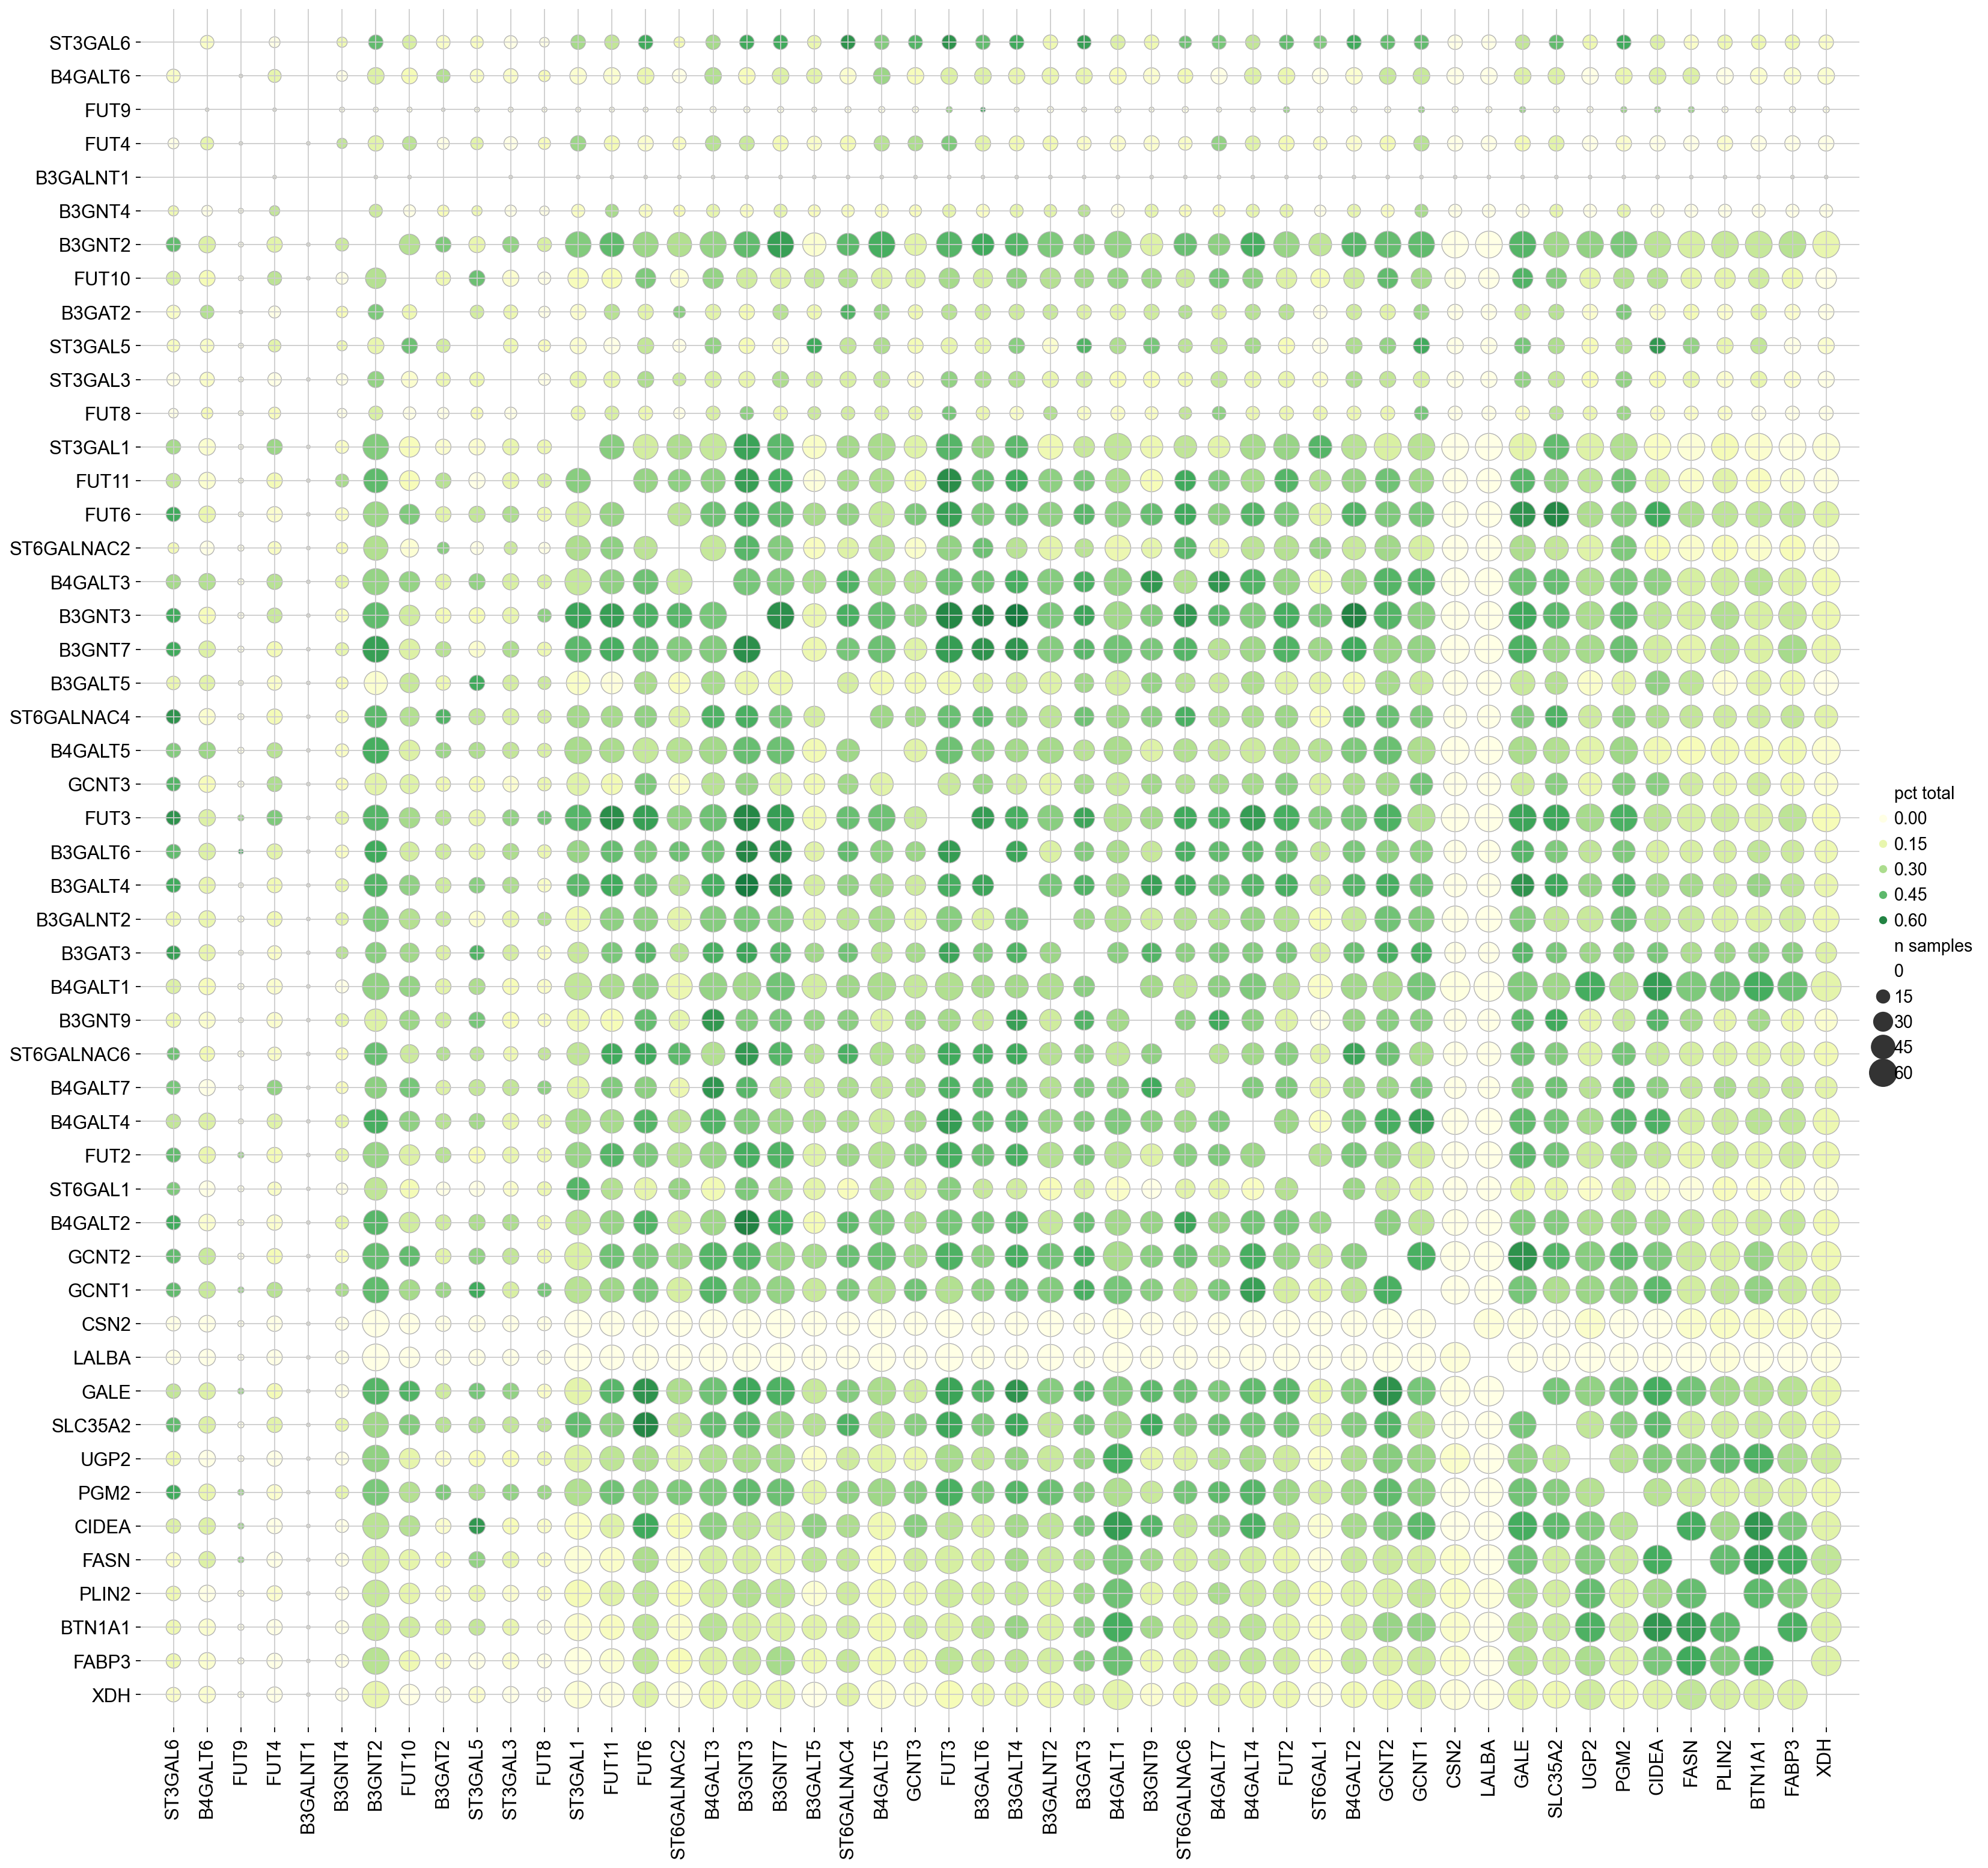

In [31]:
#lc1 with lc2 order

h_df_lc1_mfg = make_hypergeometric_dataframe(lc1, list(set(genes+mfg_genes+lactose_synthesis)),method=hypergeom_p)
total_association_groups_lc1 = count_associations_each_type(h_df_lc1_mfg)
pct_total_samples,_=find_pct_associated(h_df_lc1_mfg,total_association_groups_lc1,n_assoc=500,
                                        include_all_genepairs = False)


pct_total_samples,n_total_samples=find_pct_associated(h_df_lc1_mfg,total_association_groups_lc1,
                                                      n_assoc=1000,include_all_genepairs = True)
gene_order = list(gene_order_HMO_genes) 
gene_order = gene_order + [i for i in list(gene_order_lac_genes) if i not in gene_order]
gene_order = gene_order + [i for i in list(gene_order_mfg_genes) if i not in gene_order]
gene_order = [i for i in gene_order if i in pct_total_samples.index]                         

plot_relplot(pct_total_samples,n_total_samples,gene_order = gene_order,height=20,vmax=0.8,vmin=0.0)
plt.savefig("/Users/snyquist/Dropbox (Gladstone)/HMO_scRNAseq_manuscript/Figures/Figure3 - Coexpression of HMO genes/Figure3B_LC1_HMO_MFG_Lactosesynth_relplot.pdf")

In [85]:
gene_order=[i for i in list(gene_order_pgr_genes)+list(gene_order_HMO_genes) if i in pct_total_samples.index]